In [88]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings

warnings.filterwarnings("ignore")

In [89]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')

In [90]:
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'}, inplace = True )

In [91]:
data_1 = data.iloc[0:60000]

In [64]:
data_1.to_csv(my_path + "/Data_postproc" + '/output.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)
data_1.to_csv(my_path + "/Data_postproc" + '/fb-messages.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)
data_1[['Source', 'Target']].to_csv(my_path + "/Data_postproc" + '/Output_wt.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)

<span style="color:orange">
    
## Исследование распределения связей ##

<span style="color:orange">
Задание графа на данных без времени (статический граф).
И вычисление PageRank

In [65]:
data_1 = data.copy()
data_1.drop(['Time_start'], axis= 1 , inplace= True)
data_list = data_1.values.tolist()

G = nx.Graph()
G.add_edges_from(data_list)
G.remove_edges_from(nx.selfloop_edges(G))

pr = nx.pagerank(G, alpha=0.9)

In [66]:
X = list(pr.values())

Xord = np.sort(X, axis=0)
MaxN = len(X)

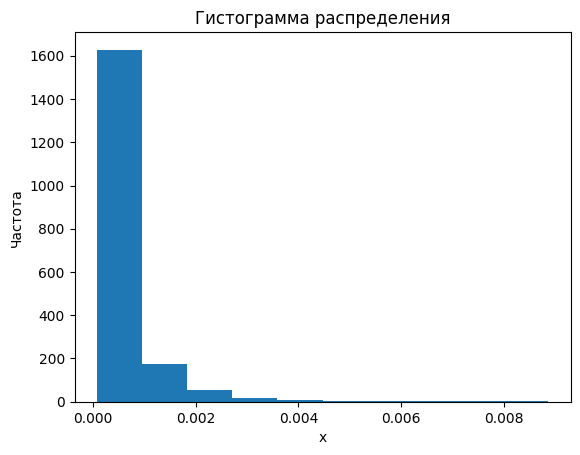

In [67]:
plt.hist(X), #bins = 150, range = (0, 200), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

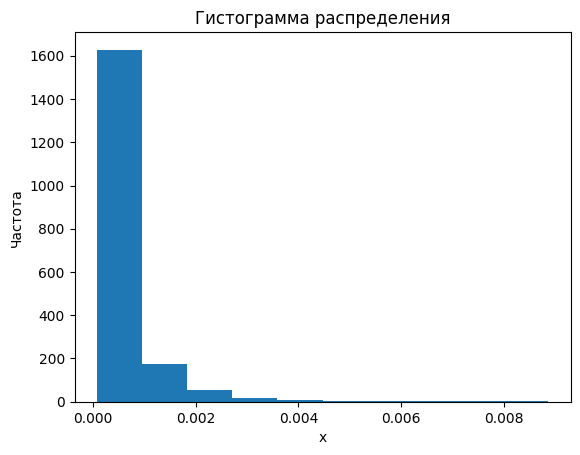

In [68]:
plt.hist(X)#, bins = 150, range = (0, 500), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

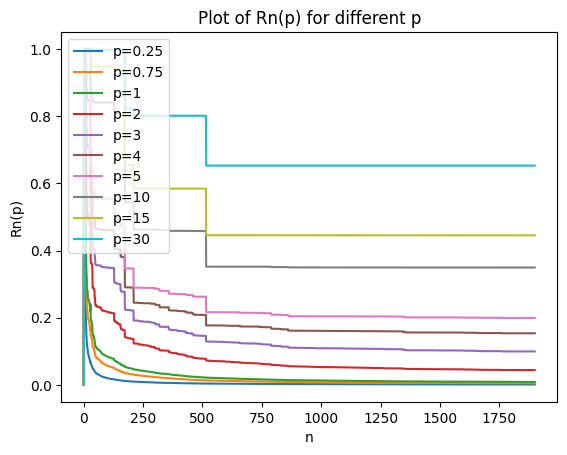

In [69]:
#2 exersice

arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.show()



#Не понятно как сделать выводы о моментах 

<span style="color:orange">

По итогам исследования можно сказать, 
Для $p \in \lbrace 0.25, 0.75, 1 \rbrace $ $R_{n}(p)$ по всей видимости стремиться к нулю при возрастании n.
Для $p \in \lbrace 2, 3, 4, 5, 10, 15, 30 \rbrace $ $ Rn(p)$ по всей видимости стремиться к положительной константе при возрастании n.

Вывод: $E|X|^{p} < \infty$ для $p \leqslant 1$ только, $E|X|^{p} = \infty$ для $p > 1$.


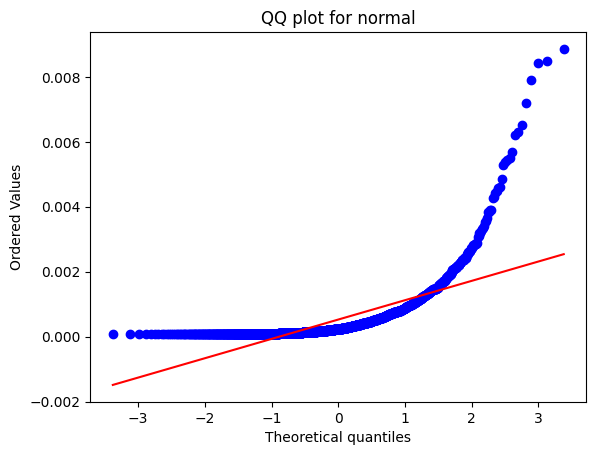

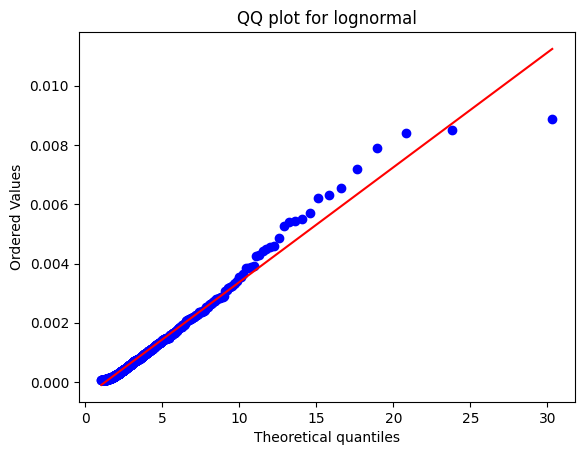

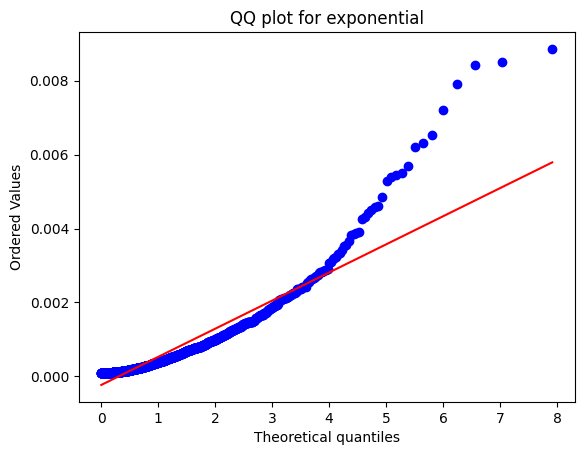

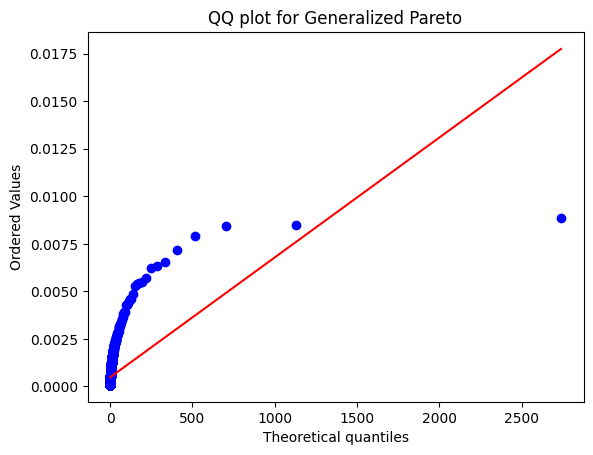

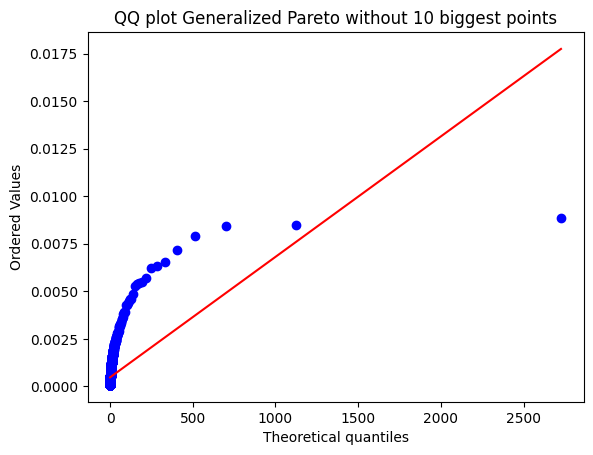

In [70]:
#3 exersice

stats.probplot(Xord, dist="norm", plot=plt)
plt.title('QQ plot for normal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.lognorm(1,1), plot=plt)
plt.title('QQ plot for lognormal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.expon, plot=plt)
plt.title('QQ plot for exponential') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot for Generalized Pareto') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

plt_dat = np.arange(1, 10, 1) 
Xord_noP = np.delete(Xord, plt_dat, axis=0)
stats.probplot(Xord_noP, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot Generalized Pareto without 10 biggest points') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

#зависит ли QQ plot от параметров распределений типа (1, 1)
#В парето распределении какое задавать гамма и сигма


<span style="color:orange">

Постановка задачи:
Построить QQ-plot для упорядоченных данных для распределений: нормального, логнормального, экспоненциального и Парето общего.

На графиках представлен QQ-plot, где красная линия $y=x$
Вывод: логнормальное распределение относительно подходит под выборку.

In [71]:
#4 exersice
#print(X)

# U = np.arange(0, 0.1, 0.0001)
# En = np.zeros(len(U))
# SumUp = 0
# SumDn = 0

# for u in range (0, len(U)):
#     SumUp = 0
#     SumDn = 0
#     for i in range (0, len(X)):
#         if (X[i] > U[u]):
#             SumUp += X[i]
#             SumDn += 1
#     En[u] = SumUp / SumDn


# pltN = np.arange(1, MaxN+1, 1)
# legend = []

# plt.plot(U, En)
# plt.xlabel('u') #Подпись для оси х
# plt.ylabel('En(u)') #Подпись для оси y
# plt.title('Plot of En(u)') #Название
# plt.show()


In [72]:
MaxN = len(X) - 1
MaxNRange = len(X)
MaxK = len(X) - 1

In [73]:
#5 exersice
#Hills estimator
def Hill(X):
    MaxK = len(X) - 1
    GammaH = np.zeros(MaxK)
    Xord = np.sort(X, axis=0)
    
    for k in range (0, MaxK):
        GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
        
    return GammaH
    

#Ratio estimator
def Ratio_estimator(X):
    Xord = np.sort(X, axis=0)
    Level = np.linspace(Xord[0], Xord[-1], 100)
    REst = np.zeros(len(Level))
    
    for n in range (1, len(Level)-1):
        SumUp = 0
        SumDn = 0
        for i in range(0, len(X)):
            if (X[i] > Level[n]):
                SumUp += np.log(X[i] / Level[n])
                SumDn += 1
        REst[n] = SumUp / SumDn
        
    return REst


#Moment estimator
def Moment_estimator(X):
    MaxK = len(X) - 1
    Xord = np.sort(X, axis=0)
    GammaM = np.zeros(MaxK)
    for k in range (0, MaxK):
        SumDn = 0
        for i in range(0, k+1): 
            SumDn += (np.log(Xord[-1-i+1]) - np.log(Xord[-1-k])) ** 2
        SumDn /= k+1
        GammaM[k] = GammaH[k] + 1 - 0.5 / (1 - (GammaH[k] ** 2) / SumDn)

    return GammaM


#UH estimator
def UH_estimator(X):
    MaxK = len(X) - 1
    GammaUH = np.zeros(MaxK)
    Xord = np.sort(X, axis=0)
    UH = np.zeros(MaxK)
    GammaH = Hill(X)
    
    for i in range(0, MaxK):
        UH[i] = Xord[-(i+2)] * GammaH[i]
    
    for k in range (0, MaxK-1):
        GammaUH[k] = (1/(k+1)) * np.sum(np.log(UH[0:k+1])) - np.log(UH[k+1])  
    GammaUH[MaxK-1] = GammaUH[MaxK-2]

    return GammaUH


#Pickands's estimator
def Pickands_estimator(X):
    MaxK = len(X) - 1
    Xord = np.sort(X, axis=0)
    GammaP = np.zeros(round(MaxK/4))
    for k in range(0, round(MaxK/4)):
        GammaP[k] = (1/np.log(2)) * (np.log((Xord[-(1+k)] - Xord[-(2*k+2)]) \
                                        /(Xord[-(2*k+2)] - Xord[-(4*k+4)])))

    return GammaP


def Mixed_moment(X):
    MaxK = len(X) - 1
    num_gamma = np.zeros(MaxK)
    GammaMM_k = 0
    L_MM_n = 0
    M_MM_n = 0
    MM_phi = 0  
    Xord = np.sort(X, axis=0)
    
    for k in range(0, MaxK):
        L_MM_n = 1 - (1/(k+1)) * np.sum(np.divide(Xord[-(k+2)], Xord[-1:-(k+2):-1]))
        M_MM_n = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
        MM_phi = (M_MM_n - L_MM_n) / (L_MM_n * L_MM_n)
        GammaMM_k = (MM_phi - 1) / (1 + 2 * np.min((MM_phi - 1), 0))  
        num_gamma[k] = GammaMM_k

    return num_gamma


def plot_est(Data, interval=slice(200, 500), label='Data'):
    legend = []
    plt.plot(np.arange(1, len(Data)+1), Data)
    plt.axhline(y = Data[interval].mean(), color = 'r', linestyle = '-')
    print(Data[interval].mean())
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(label + '(k)') #Подпись для оси y
    plt.title(label) #Название
    plt.ylim(0, 2)
    legend.append(label)
    legend.append(f"label.mean={Data[interval].mean()}")
    plt.legend(legend, loc="upper left")
    plt.show()

In [74]:
GammaH = Hill(X)
REst = Ratio_estimator(X)
GammaM_data = Moment_estimator(X)
GammaUH = UH_estimator(X)
GammaP = Pickands_estimator(X)
num_gamma = Mixed_moment(X)

0.6271297014647863


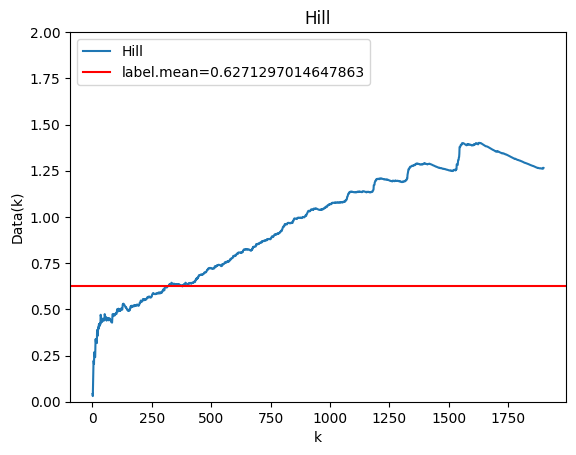

nan


/tmp/ipykernel_4005/163757328.py:99: RuntimeWarning: Mean of empty slice.
  plt.axhline(y = Data[interval].mean(), color = 'r', linestyle = '-')
/home/mikle/ML/Girafe/env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_4005/163757328.py:100: RuntimeWarning: Mean of empty slice.
  print(Data[interval].mean())
/tmp/ipykernel_4005/163757328.py:106: RuntimeWarning: Mean of empty slice.
  legend.append(f"label.mean={Data[interval].mean()}")


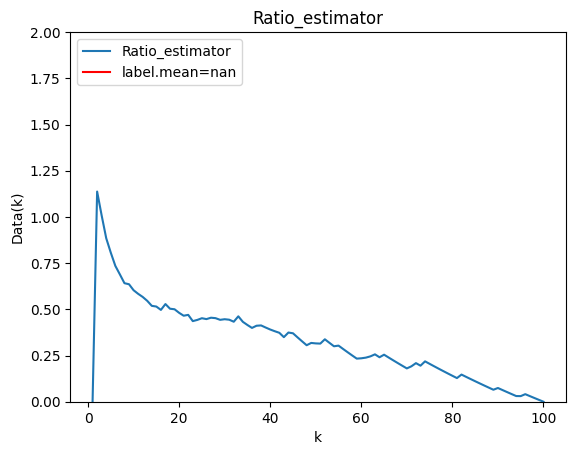

0.42872495202727273


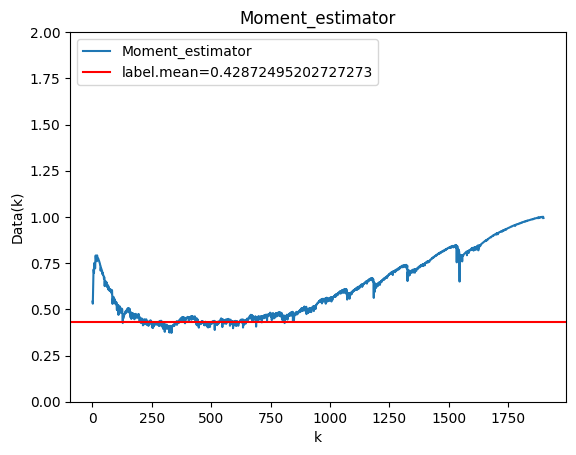

0.3893937768427499


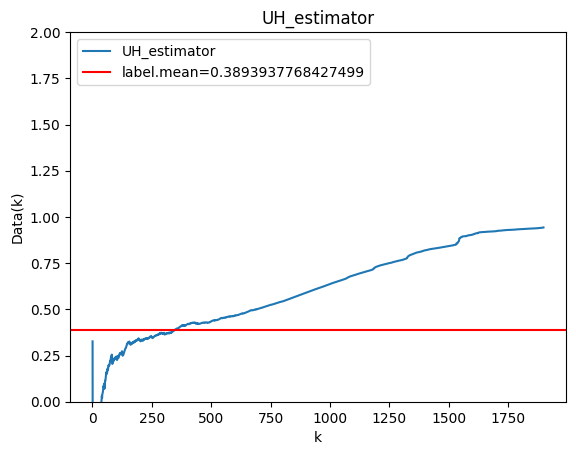

0.6526215515952788


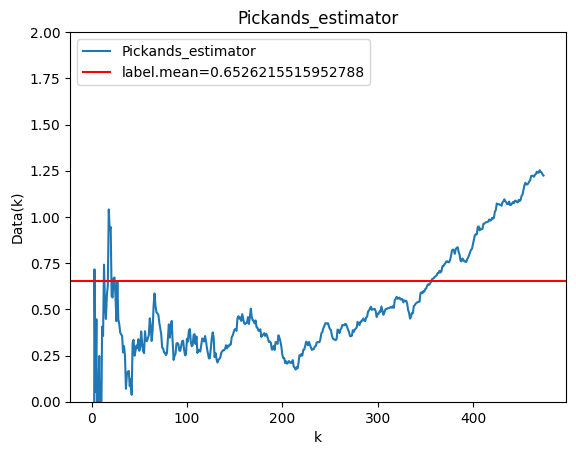

0.21327204423486676


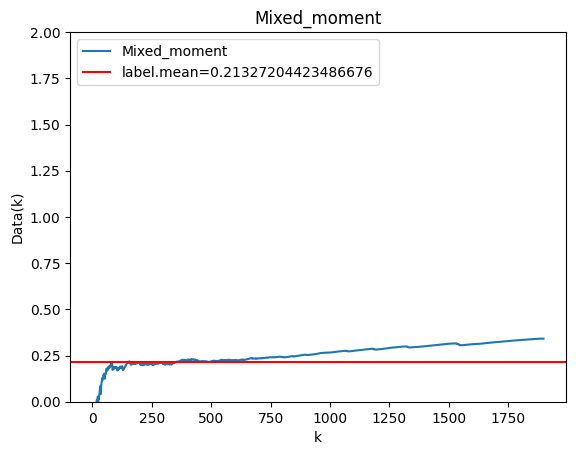

In [75]:
interval = slice(200, 500)
plot_est(GammaH, interval, label='Hill')
plot_est(REst, interval, label='Ratio_estimator')
plot_est(GammaM_data, label='Moment_estimator')
plot_est(GammaUH, label='UH_estimator')
plot_est(GammaP, label='Pickands_estimator')
plot_est(num_gamma, label='Mixed_moment')

<span style="color:orange">

Оценку хвостового индекса сделать затруднительно.

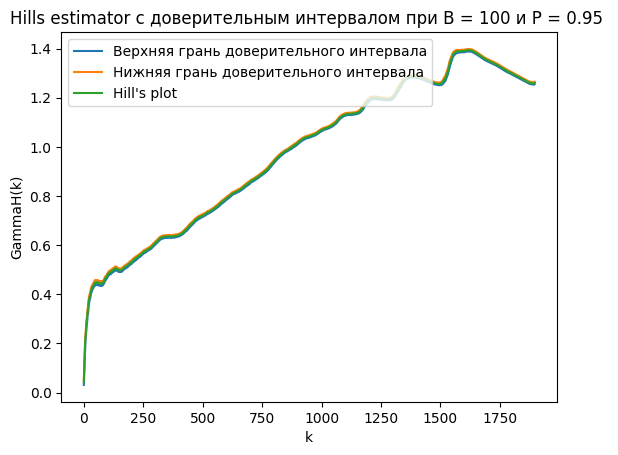

In [76]:
#6 exersice

MaxN = len(X)
B = 100
PlotCIup = []
PlotCIdn = []
PlotCImn = []

#Bootstrap
y = np.zeros((B, MaxN))
GammaH_Boot = np.zeros((B, MaxN-1))
Gamma_stable = np.zeros(B) #стабильность графика замечается на 300 значении

#StDev_Gamma = np.zeros(B)
for i in range(B):
    for j in range(MaxN):
        y[i,j] = random.choice(list(X))
    GammaH_Boot[i,:] = Hill(y[i,:])
#        Mean_Gamma[i] = GammaH_Boot[i,:].mean()
#        StDev_Gamma[i] = GammaH_Boot[i,:].std()
#    Gamma_stable[i] = GammaH_Boot[i, 300]

for i in range(MaxN-1):
#    Data75 = stats.norm.interval(0.75, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    Data95 = stats.norm.interval(0.95, loc=np.mean(GammaH_Boot[:, i]), scale=stats.sem(GammaH_Boot[:, i]))
#    Data99 = stats.norm.interval(0.99, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    PlotCIup.append(Data95[0])
    PlotCIdn.append(Data95[1])
    PlotCImn.append(GammaH_Boot[:, i].mean())

legend = []

plt.plot(PlotCIup)
legend.append("Верхняя грань доверительного интервала")
plt.plot(PlotCIdn)
legend.append("Нижняя грань доверительного интервала")
plt.plot(PlotCImn)
legend.append("Hill's plot")

plt.legend(legend, loc="upper left")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title(f"Hills estimator с доверительным интервалом при B = {B} и P = {0.95} ") #Название
#plt.savefig(my_path + '/Exercise6.png')
plt.show()

<span style="color:orange">
    
## Разбиение на сообщества ##

In [77]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'} \
           , inplace = True )

In [78]:
comm = nx.community.louvain_communities(G, seed=123)

In [79]:
#data_com_1 = data_1.loc[((data_1['Source']) == any(comm[1]))]
data_com_1 = data_1[data_1['Source'].isin(comm[0])]
print(data_com_1)

       Source  Target
1         674     674
2         571     571
9        1859    1859
10       1487    1487
15       1792    1792
...       ...     ...
61605    1270    1663
61653     818     278
61654     818    1462
61656     818    1462
61658     818    1462

[2241 rows x 2 columns]


In [80]:
data_list_1 = data_com_1.values.tolist()
G1 = nx.Graph()
G1.add_edges_from(data_list_1)
G1.remove_edges_from(nx.selfloop_edges(G1))

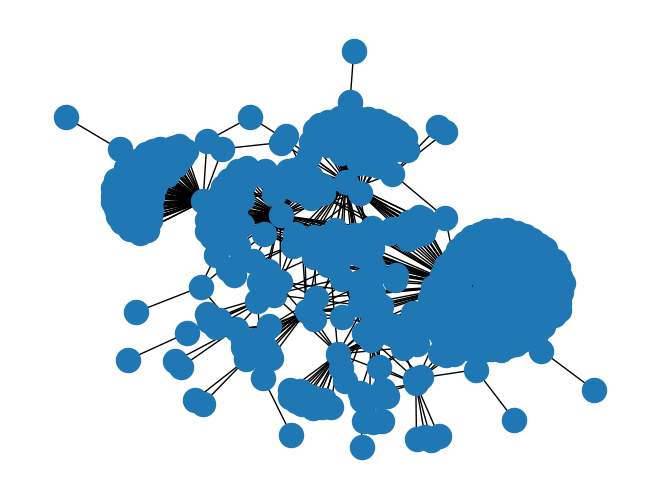

In [81]:
nx.draw(G1)

In [82]:
Graph_list = nx.to_pandas_edgelist(G1)
print(Graph_list)

     source  target
0       674    1270
1       674     524
2       571    1859
3       571       2
4       571     524
..      ...     ...
662     741    1891
663     864    1661
664     864    1588
665     459     460
666     461     460

[667 rows x 2 columns]


In [83]:
Graph_list.to_csv(my_path + "/Data_postproc" + '/Comm1.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)

<span style="color:orange">
    
## Проверка стационарности ##
Подбор последовательности

In [84]:
df_pr = pd.DataFrame(list(pr.items()), columns=['Node', 'PageRank'])
print(df_pr)

      Node  PageRank
0      563  0.001464
1      674  0.000190
2      571  0.000229
3      667  0.000278
4      822  0.000084
...    ...       ...
1894  1383  0.000090
1895  1385  0.000086
1896   810  0.000130
1897  1381  0.000083
1898  1382  0.000863

[1899 rows x 2 columns]


In [163]:
def Teil_index_by_sec(df_pr):
    sec = []
    for j in range(200):
        num = random.choice(list(df_pr['Node']))
        sec.append(df_pr[df_pr['Node'] == num]['PageRank'])
    
    Tail_data = Mixed_moment(sec)
    index = Tail_data[100:400].mean()
  
    return index


def Teil_index_mean_std(df_pr):
    list_index = pd.Series()
    for i in range(15):
        list_index[i] = Teil_index_by_sec(df_pr)
        
    return list_index.mean(), list_index.std()


def value_index_time(data_vt, time):
    # Time_start = int(data_vt['Time_start'].min())
    # Time_stop = int(data_vt['Time_start'].max())
    # step = (Time_stop - Time_start) / 10
    list_time_mean = []
    list_time_std = []

    G1 = nx.Graph()
    for i in range(1, len(time)):
        G1.clear()
        df_iter = data_vt[data_vt['Time_start'] < time[i]]
        
        data_list_t = df_iter[['Source', 'Target']].values.tolist()
        G1 = nx.Graph()
        G1.add_edges_from(data_list_t)
        G1.remove_edges_from(nx.selfloop_edges(G1))
        print(nx.number_of_nodes(G1))
        
        pr_t = nx.pagerank(G1, alpha=0.9)
        df_pr_t = pd.DataFrame(list(pr_t.items()), columns=['Node', 'PageRank'])
        
        list_time_mean.append(Teil_index_mean_std(df_pr_t)[0])
        list_time_std.append(Teil_index_mean_std(df_pr_t)[1])
        
    return list_time_mean, list_time_std

In [179]:
Time_start = int(data['Time_start'].min())
Time_stop = int(data['Time_start'].max())
step = (Time_stop - Time_start) / 90
time_list = []
for i in range(11, 35):
    time_list.append(Time_start + i * step)

print(Time_start)
print(Time_stop)
print(time_list)

1080090740
1098769942
[1082373753.5777779, 1082581300.2666667, 1082788846.9555554, 1082996393.6444445, 1083203940.3333333, 1083411487.0222223, 1083619033.711111, 1083826580.4, 1084034127.088889, 1084241673.7777777, 1084449220.4666667, 1084656767.1555555, 1084864313.8444445, 1085071860.5333333, 1085279407.2222223, 1085486953.911111, 1085694500.6, 1085902047.288889, 1086109593.9777777, 1086317140.6666667, 1086524687.3555555, 1086732234.0444446, 1086939780.7333333, 1087147327.4222221]


In [180]:
list_val, list_std = value_index_time(data, time_list)

141
310
403
519
685
764
922
1020
1074
1158
1186
1239
1316
1392
1456
1535
1569
1598
1657
1674
1698
1728
1737


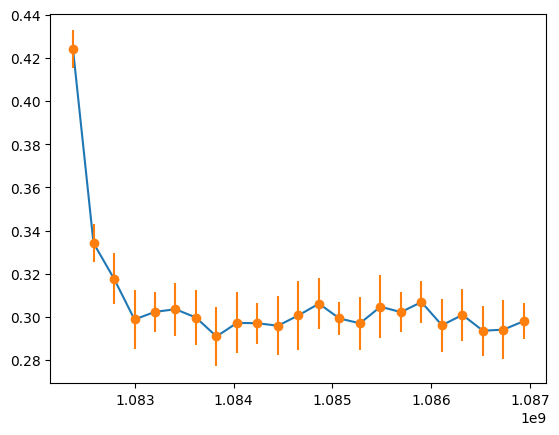

In [181]:
#plt.plot(time_list[:-1], list_val)
plt.plot(time_list[:-1], list_val)
plt.errorbar(time_list[:-1], list_val, yerr=list_std, fmt="o")
plt.show()

In [182]:
for i in range(10, 25):
    df_iter = data[data['Time_start'] < time_list[i]]
    print((df_iter['Source'].unique()).size)

1158
1186
1239
1316
1392
1456
1535
1569
1598
1657
1674
1698
1728
1737


IndexError: list index out of range